<a href="https://colab.research.google.com/github/HongYeongPyo/first-repository/blob/master/mainquest05_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
card_train = train =pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/train.csv")
card_test = test= pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/test.csv")

In [ ]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [ ]:
test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113923 entries, 0 to 113922
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      113923 non-null  int64  
 1   Time    113923 non-null  float64
 2   V1      113923 non-null  float64
 3   V2      113923 non-null  float64
 4   V3      113923 non-null  float64
 5   V4      113923 non-null  float64
 6   V5      113923 non-null  float64
 7   V6      113923 non-null  float64
 8   V7      113923 non-null  float64
 9   V8      113923 non-null  float64
 10  V9      113923 non-null  float64
 11  V10     113923 non-null  float64
 12  V11     113923 non-null  float64
 13  V12     113923 non-null  float64
 14  V13     113923 non-null  float64
 15  V14     113923 non-null  float64
 16  V15     113923 non-null  float64
 17  V16     113923 non-null  float64
 18  V17     113923 non-null  float64
 19  V18     113923 non-null  float64
 20  V19     113923 non-null  float64
 21  V20     11

### train.csv, test.csv  
- V로 시작하는 피커들의 의미는 모른다.
- time 피처 : 데이터 생성 관련한 작업용 속성 - 제거함
- amount 피처 : 신용카드 트랜잭션 금액
- class : 레이블, 0의 경우은 정상, 1의 경우는 사기 트랜잭션
  
- 전체 레코드 수 : 170,883개. 결측치는 없다.
- total columns : 32개
- id, Class 레이블은 int형, 나머지 피쳐는 floar형

In [ ]:
# 170882 를 기점으로 그 뒤 시점으로 자름

train["id"].max(), test["id"].min()


(170882, 170883)

In [ ]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
train["Class"].value_counts(normalize=True)*100


Class
0    99.78933
1     0.21067
Name: proportion, dtype: float64

### train 데이터프레임의 Class 컬럼값의 분포를 백분율로 확인
- Class=0 (정상거래) : 전체 데이터의 약 99.79%
- Class=1 (사기거래) : 전체 데이터의 약 0.21%

- Amount, 즉 카드 사용금액이 1,000불 이하인 데이터가 대부분
- 20,000불까지 드물지만 많은 금액을 사용한 경우가 발생 - 꼬리가 긴 형태의 분포 곡성

### V14 이상치 제거
- IQR을 이용해 이상치를 검출하는 get_outlier()함수 생성
- get_outlier() 함수 : 인자로 DataFrame과 이상치를 검출한 칼럼을 입력 받는다
  

###  [ get_outlier 함수 작성 ]

In [ ]:
# get_outlier 함수

import numpy as np

def get_outlier(df= None, column= None, weight=1.5):
  fraud = df[df['Class']==1][column]                # fraud에 해당하는  column 데이터만 추출
  quantile_25 = np.percentile(fraud.values, 25)      # 1/4분위 지점을 np.percdntile로 구함
  quantile_75 = np.percentile(fraud.values, 75)      # 3/4분위 지점

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight

  lowest_val = quantile_25 - iqr_weight           # 최솟값
  highest_val = quantile_75 + iqr_weight          # 최댓값

  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index   # 설정된 이상치를 DataFrame index반환
  return outlier_index


In [ ]:
# get_outlier() 함수를 이용해서 V14 칼럼에서 이상치 데이터 찾기
outlier_index = get_outlier(df=card_train, column= 'V14', weight= 1.5)
print('이상치 데이터 인덱스', outlier_index)

이상치 데이터 인덱스 Index([8296, 8615, 9035], dtype='int64')


- 총 3개의 데이터 : 8296, 8615, 9035의 index가 이상치로 추출


 ### get_prodessed()를 로그 변환 후, V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
 - get_outlier() 를 이용해 이상치를 추출하고,
 - 이를 삭제하는 로직을 get_processed_df() 함수에 추가하여 데이터 가공

In [ ]:
# 전처리항 DataFrame: 학습 데이터(train)일 경우만 이상치 제거
def get_preprocessed_df(df=None, train=True):

    df_copy = df.copy()                                      # 원본 손상을 방지하기 위해 복사본 생성
    amount_n = np.log1p(df_copy["Amount"])                   # 거래금액의 편차가 커서 로그 변환

    df_copy.insert(0, "Amount_Scaled", amount_n)             # 새컬럼 삽입
    df_copy.drop(["Time", "Amount"], axis=1, inplace=True)   # 불필요한 컬럼 제거

    outlier_index = get_outlier(df=df_copy, column="V14", weight=1.5)  # V14기준으로 IQR 방식 이상치를 찾고 거거
    df_copy.drop(outlier_index, axis=0, inplace=True)

    return df_copy

In [ ]:
# 전처리 함수 실행 (df_copy는 함수 반환값으로 받아야 함)
processed_train = get_preprocessed_df(df=card_train, train=True)

# 전처리된 데이터프레임에서 'Class' 개수 출력
print(processed_train['Class'].value_counts())


Class
0    170523
1       357
Name: count, dtype: int64


In [ ]:
# 전처리된 데이터프레임에서 클래스 비율 출력
card_train["Class"].value_counts(normalize=True)*100

Class
0    99.78933
1     0.21067
Name: proportion, dtype: float64

- 초기 데이터 건수 : 170,883 건
- 이상치 3개 전처리한 후 : 170.523+357 = 170,880 건

In [ ]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
from re import X
def get_train_test_dataset(df=None ):       # 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
    df_copy = get_preprocessed_df(df)       # 인자로 입력된 Da aFrame 의 사전 데이터 가공이 완료된 복사 Dat aFrame 반환

    X_features = df_copy. iloc[: , :-1]     # DataFrame 의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    y_target = df_copy. iloc[: , -1]

# train_test_split( ）으로 학습과 테스트 데이터 분할. stratify=y_traget으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

    return X_train, X_test, y_train, y_test   # 학습과 테스트 데이터 세트 반환

X_train, X_test, y_train, y_test = get_train_test_dataset(card_train)

- 생성한 학습 데이터 세트와 테스트 세트의 레이블 값 비율을 백분율로 환산
- 서로 비슷하게 분활되었는지 확인

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)

print('테스트 데이너 레이블 값 비율')
print(y_test.value_counts() / y_test.shape[0]*100)

학습 데이터 레이블 값 비율
Class
0    99.790998
1     0.209002
Name: count, dtype: float64
테스트 데이너 레이블 값 비율
Class
0    99.791277
1     0.208723
Name: count, dtype: float64


- 학습 데이터 레이블의 경우 : 1 값이 약 20.9%
- 테스트 데이터 레이블의 경우 : 1 값이 약 20.8%
- 차이 없이 잘 분할되었다.

### 데이터 가공을 수행하면서 예측 성능이 어떻게 변화하는가?
- 로지스틱 회귀 기반의 모델 : get_clf_eval() 함수 사용
- LightGBM 기반의 모델

## 1. 로지스틱 회귀를 이용

### [ get_clf_aval() ]
- 함수 인자 2개에서 3개. roc_auc_score 추가

In [ ]:
# 1. 로지스틱 회귀를 이용한 신용카드 사기 여부 예측

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [ ]:
# 평가 함수

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)

    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)


    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision: .4f}, 재현율: {recall: .4f}, f1스코어: {f1:.4f}, roc-auc: {roc_auc:.4f}")

In [ ]:
# 성능 평가
get_clf_eval(y_test, pred, pred_proba)


오차 행렬
[[51146    11]
 [   42    65]]
정확도: 0.9990, 정밀도:  0.8553, 재현율:  0.6075, f1스코어: 0.7104, roc-auc: 0.9376


## 2. LightGBM 을 이용한 모델
- 수행 예제 코드에서 반복적으로 모델을 변경해 학습/예측/평가-> - 별도 함수 생성
- get_model_train_eval() 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 셑를 입력 받아서 학습/예측/평가를 수행하는 함수

In [ ]:
# 인자 : 사이킷런의 Estimator 객체

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### 데이터 세트 : 극도로 불균형한 레이블 값 분포도
- LGBMClassifier 객체 생성시,
- boost_from_average=False 로 파라미터 설정

### _LightGBM 버전업 되면서 변경 사항
- boot_from_average 파라미터의 디폴드 값이 False -> True

### 본 예제와 같이 극도로 불균형한 분포를 이루는 경우
- boost_from_average = True 설정은,
- 재현율 및 ROC-AUC 성능을 매우 크게 저하시킨다.

### LightGBM 2,1,0 이상의 버젼이 설치되어 있거나, 불균형한 데이터 세트에서 예측 성능이 매우 저조할 경우
- LGBMClassifier 객체 생성시 boost_from_average = False 로 파라미터 설정

In [ ]:
# LightGMB 모델 학습. 별도의 테스트 세트에서 예측 평가 (교재 코딩 p.284)
import warnings
warnings.filterwarnings('ignore')  # Python 경고 메시지 억제


from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=1000,
    num_leaves=64,
    n_jobs=-1,
    boost_from_average=False,
    verbosity=-1)               # 핵심 옵션: warning 포함 모든 로그 억제

get_model_train_eval(
    lgbm_clf,
    ftr_train = X_train,
    ftr_test = X_test,

    tgt_train = y_train,
    tgt_test=y_test)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
오차 행렬
[[51153     4]
 [   18    89]]
정확도: 0.9996, 정밀도:  0.9570, 재현율:  0.8318, f1스코어: 0.8900, roc-auc: 0.9769


### [  LogisticRegression 과 LightGBM 성능평가 비교  ]

1. LogisticRegression : 정확도: 0.9990, 정밀도:  0.8553, 재현율:  0.6075, f1스코어: 0.7104, roc-auc: 0.9376
2. LightGBM           : 정확도: 0.9996, 정밀도:  0.9570, 재현율:  0.8318, f1스코어: 0.8900, roc-auc: 0.9769

전체적으로 LightGBM이 높다

## 3. 데이터 분포도 변환 후 모델 학습/예측/평가
### 왜곡된 분포도를 가지는 데이터를 재가공한 뒤에 모델 테스트
- 중요 피처 값의 분포도를 살펴본다.

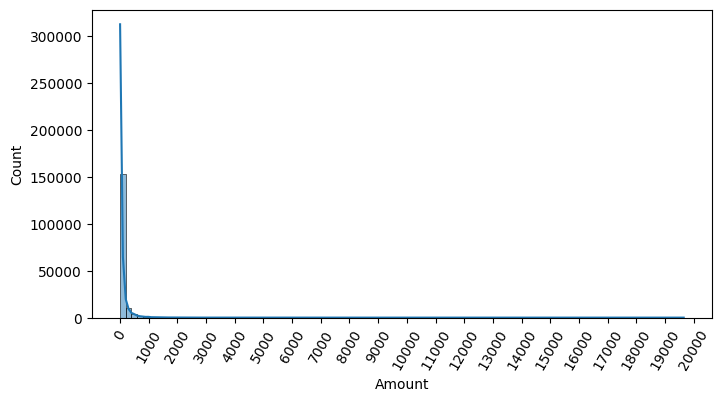

In [ ]:
# Amount 피처의 분포도 학인

import seaborn as sns

plt.figure(figsize = (8, 4))
plt.xticks(range(0, 30000, 1000), rotation = 60)
sns.histplot(card_train['Amount'], bins = 100, kde = True)

plt.show()


Amount, 즉 카드 사용금액이 1,000불 이하인 데이터가 대부분
20,000불까지 드물지만 많은 금액을 사용한 경우가 발생 - 꼬리가 긴 형태의 분포 곡성

### 이상치 데이터 제거
- IQR 이용 제거

1. 어떤 피처이 이상치 데이터를 검출할 것인지 선택 필요
     - 결정 값(즉 레이블)과가장 상관성이 높은 피처들을 위주로 이상치를 검출
     - 모든 피처들이 이상피를 검출하는 것은 시간소모가 많다
     - 결정값과 상관성이 높지 않은 피처들의 경우는 이상치를 제거하더라도 성능 향상에 크게 기여 하지 않는다.

- DataFrame() 의 corr()를 이용하여 각 픽퍼별로 상관도를 구한 뒤
- 시본의 heatmap을 통해 시각화

<Axes: >

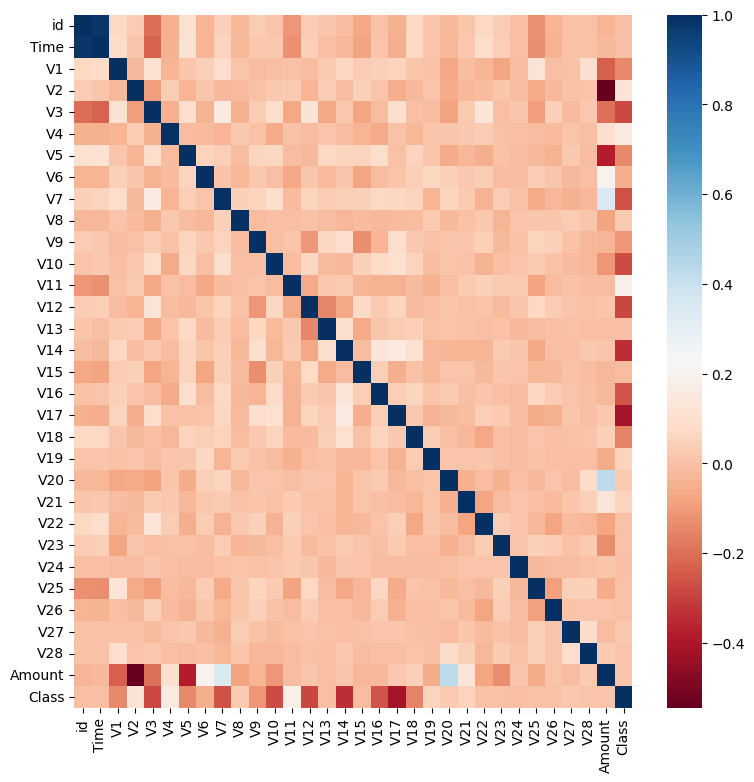

In [ ]:
import seaborn as sns

plt.figure(figsize = (9,9))
corr = card_train.corr()
sns.heatmap(corr, cmap='RdBu')

### 상관관계 히트맵 : cmap을 'RuBu'로 설정
- 양의 상관관계가 높을수로 색깔이 진한 파란색에 가깝게 표현
- 음의 상관관계가 높을수록 색깔이 진한 빨간색에 가깝게 표현
- 맨 아래에 위치한 결정 레이블인 Class 파처와 음의 상관 관계가 가장 높은 피처는 V14와 V17

### V14 이상치 제거
- IQR을 이용해 이상치를 검출하는 함수 생성한 뒤, 검출된 이상치 삭제
- get_outlier() 함수 : 인자로 DataFrame과 이상치를 검출한 칼럼을 입력 받는다

### 함수 내에서 넘파이의 percentile()을 이용하여,
- 1/4분위와 3/4 분의를 구하고, 이에 기반해 IQR을 계산
- 계산된 IQR에 1.5를 곱해서 최댓값고 ㅏ최솟값 지점을 구한 뒤,
- 최댓값보다 크거나 최솟값보다 작은 값을 이상치로 설정하고,
- 해당 이상치가 있는 DataFrame Index를 반환

In [ ]:
import numpy as np

def get_outlier(df= None, column= None, weight=1.5):
  fraud = df[df['Class']==1][column]                # fraud에 해당하는  column 데이터만 추출
  quantile_25 = np.percentile(fraud.values, 25)      # 1/4분위 지점을 np.percdntile로 구함
  quantile_75 = np.percentile(fraud.values, 75)      # 3/4분위 지점

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight

  lowest_val = quantile_25 - iqr_weight           # 최솟값
  highest_val = quantile_75 + iqr_weight          # 최댓값

  outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index   # 설정된 이상치를 DataFrame index반환
  return outlier_index

### 이상치 제거 후 로지스틱 회귀와 LightGBM 모델을 적용
- get_outlier() 를 이용해 이상치를 추출하고,
- 이를 삭제하는 로직을 get_processed_df() 함수에 추가하여 데이터를 가공한다.

In [ ]:
# V14 컬럼 이상치 찾기
outlier_index = get_outlier(df=card_train, column= 'V14', weight= 1.5)
print('이상치 데이터 인덱스', outlier_index)

이상치 데이터 인덱스 Index([8296, 8615, 9035], dtype='int64')


In [ ]:
# get_prodessed()를 로그 변환 후, V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df= None) :
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.drop(['Time', 'Amount'], axis = 1, inplace = True)

  #이상치 데이ㅓ 삭제하는 로직 추가
  outlier_index = get_outlier(df=df_copy, column= 'V14', weight= 1.5)
  df_copy.drop(outlier_index, axis= 0, inplace= True)
  return df_copy

In [ ]:
# 로지스틱 회귀와 LightGBM 모델을 적용 한 후  예측 성능 확인
X_train, X_test, y_train, y_test = get_train_test_dataset(card_train)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(
    lr_clf,
    ftr_train = X_train,
    ftr_test = X_test,
    tgt_train = y_train,
    tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(
    lgbm_clf,
    ftr_train = X_train,
    ftr_test = X_test,
    tgt_train = y_train,
    tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[51145    12]
 [   36    71]]
정확도: 0.9991, 정밀도:  0.8554, 재현율:  0.6636, f1스코어: 0.7474, roc-auc: 0.9369
### LightGBM 예측 성능 ###
오차 행렬
[[51150     7]
 [   18    89]]
정확도: 0.9995, 정밀도:  0.9271, 재현율:  0.8318, f1스코어: 0.8768, roc-auc: 0.9774


# 4. SMOTE 오버 샘플링 적용 후 보델 학습/예측/평가
- imbalanced-learn 패키지의 SMOTE 클래스를 이용해 구현
- SMOTE를 적용할 때는 반드시 학습 데이터 세트만 오버 셈플링을 해야한다.

### 검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링할 경우
- 결국은 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 데스트를 수행하기 떄문에 올바른 검증/테스트가 될 수 없다.

### 데이터를 증식 전과 비교
- 앞 예제에서 생성한 학습 피처/레이블 데이터를 SMOTE 객체의 fir_resample() 메서드를 이용하여 증식한 뒤 비교한다.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("학습 데이터 레이블 값 비율")
print(y_train.value_counts()/y_train.shape[0] * 100)
print()
print("테스트 데이터 레이블 값 비율")
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.790998
1     0.209002
Name: count, dtype: float64

테스트 데이터 레이블 값 비율
Class
0    99.791277
1     0.208723
Name: count, dtype: float64


In [ ]:
smote = SMOTE(random_state=0)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ", X_train.shape, y_train.shape)
print("\nSMOTE 적용 후 학습용 피처/레이블 데이터 세트: ", X_train_over.shape, y_train_over.shape)
print("\nSMOTE 적용 후 레이블 값 분포: \n", pd.Series(y_train_over).value_counts(normalize=True))

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (119616, 29) (119616,)

SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (238732, 29) (238732,)

SMOTE 적용 후 레이블 값 분포: 
 Class
0    0.5
1    0.5
Name: proportion, dtype: float64


- SMOTE 적용 전 학습 데이터 세트 : 119,616 건
- SMOTE 적용 후 학습 데이터 세트 : 238,762 건  (2배 가깝게 증식)
- SMOTE 적용 후 레이블 값 분포 :  고르게 분포

### 생성된 학습 데이터 세트를 기반으로 우선 로지스틱 회귀 모델을 학습 한 뒤 성능 평가

In [ ]:
# ftr_train과 tgt_train 인자 값이 SMOTE 증식된 X_train_over아 y_train_over 로 변경됨에 유의

print('### 로지스틱 회귀 - 예측 성능 ###')

lr_clf = LogisticRegression(max_iter= 1000)
get_model_train_eval(
    model = lr_clf,
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test)

### 로지스틱 회귀 - 예측 성능 ###
오차 행렬
[[51145    12]
 [   36    71]]
정확도: 0.9991, 정밀도:  0.8554, 재현율:  0.6636, f1스코어: 0.7474, roc-auc: 0.9369


In [ ]:
import warnings
warnings.filterwarnings("ignore")

print('### LightGBM 예측 성능 ###')

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(
    model = lgbm_clf,
    ftr_train=X_train,
    ftr_test=X_test,
    tgt_train=y_train,
    tgt_test=y_test)

### LightGBM 예측 성능 ###
오차 행렬
[[51150     7]
 [   18    89]]
정확도: 0.9995, 정밀도:  0.9271, 재현율:  0.8318, f1스코어: 0.8768, roc-auc: 0.9774


In [ ]:
# ftr_train과 tgt_train 인자 값이 SMOTE 증식된 X_train_over과  y_train_over 로 변경됨에 유의

print('### 로지스틱 회귀 - 증식된 예측 성능 ###')

lr_clf = LogisticRegression(max_iter= 1000)
get_model_train_eval(
    model = lr_clf,
    ftr_train=X_train_over,
    ftr_test=X_test,
    tgt_train=y_train_over,
    tgt_test=y_test)

### 로지스틱 회귀 - 증식된 예측 성능 ###
오차 행렬
[[50640   517]
 [   12    95]]
정확도: 0.9897, 정밀도:  0.1552, 재현율:  0.8879, f1스코어: 0.2643, roc-auc: 0.9713


In [ ]:
# ftr_train과 tgt_train 인자 값이 SMOTE 증식된 X_train_over과  y_train_over 로 변경됨에 유의

import warnings
warnings.filterwarnings("ignore")

print('### LightGBM -증식된 예측 성능 ###')

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(
    model = lgbm_clf,
    ftr_train=X_train_over,
    ftr_test=X_test,
    tgt_train=y_train_over,
    tgt_test=y_test)

### LightGBM -증식된 예측 성능 ###
오차 행렬
[[51146    11]
 [   16    91]]
정확도: 0.9995, 정밀도:  0.8922, 재현율:  0.8505, f1스코어: 0.8708, roc-auc: 0.9788


In [ ]:
submission = pd.read_csv("/kaggle/input/modu-ds-4-credit-card-fraud-detection/sample_submission.csv")

In [ ]:
test["Amount_Scaled"] = np.log1p(test["Amount"])

In [ ]:
test.drop(["Time", "Amount"], axis=1, inplace=True)

In [ ]:
lgbm_pred = lgbm_clf.predict(test)

In [ ]:
lgbm_pred_proba = lgbm_clf.predict_proba(test)

In [ ]:
test["Class"] = lgbm_pred

In [ ]:
test.Class.value_counts()

Class
0    113918
1         5
Name: count, dtype: int64

In [ ]:
del submission["Class"]

In [ ]:
test["Class"] = lgbm_pred_proba

In [ ]:
submission = submission.merge(test[["id", "Class"]], on="id")

In [ ]:
submission.to_csv("./submission.csv", index=False)